In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import astrostamps
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
cosmo = FlatLambdaCDM(70, 0.3)
import hhana
plt.style.use('../jpg.mplstyle')

In [2]:
cat = ascii.read('largevobjects-final.dat')
cat.rename_column('RA (deg)', 'ra')
cat.rename_column('DEC (deg)', 'dec')

In [3]:
nsa = hhana.load_nsa()

cut = np.zeros_like(nsa, dtype=bool)
for obj in cat:
    cut |= nsa['nsaid']==obj['NSA ID']
nsa_objs = nsa[cut].copy()

In [11]:
physical_scale = 12*u.kpc

images = []
for obj in nsa_objs:
    D_A = cosmo.angular_diameter_distance(obj['z'])
    scale = (physical_scale/D_A.to('kpc'))*u.radian.to('arcsec')
    scale_pix = scale/0.4
    print(D_A, scale, scale_pix)
    images.append(astrostamps.fetch_sdss_cutout(obj['ra'], obj['dec'], 0.4, scale_pix, scale_pix))

75.1340970737522 Mpc 32.94346736522971 82.35866841307427
56.134434154693274 Mpc 44.09374944698204 110.23437361745509
142.65105109712738 Mpc 17.351275408968927 43.37818852242231
47.05727714346296 Mpc 52.59925404139113 131.4981351034778
157.02243527514793 Mpc 15.763210337605209 39.40802584401302


In [39]:
vhelioh1 = [5335, 3999,10417, 3329, 11499]

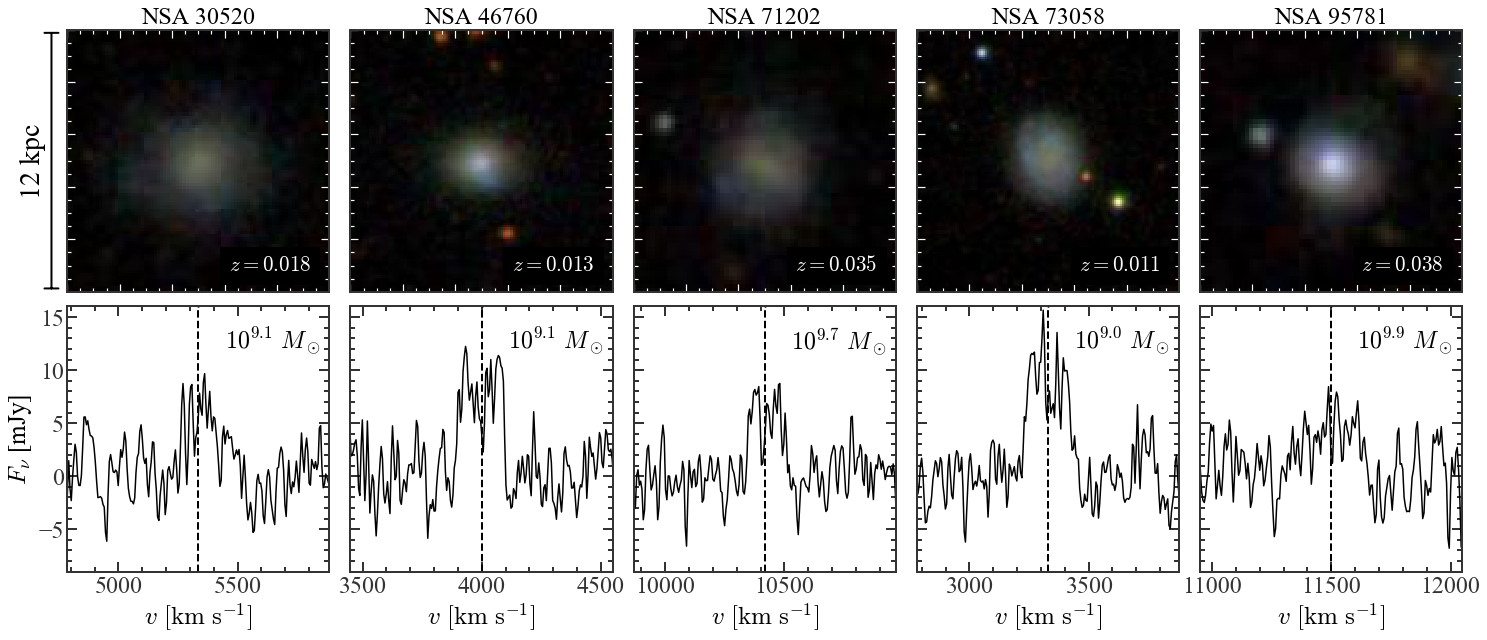

In [71]:
fig, axes = plt.subplots(2, 5, figsize=(10*5/2, 10))
fig.subplots_adjust(wspace=0.08, hspace=0.05)
axes = axes.flatten()
for i in range(len(images)):
    axes[i].imshow(images[i], extent=[0,1,0,1])
    axes[i].tick_params(axis='both', which='minor', colors='white', length=4, width=1.2)
    axes[i].tick_params(axis='both', which='major', colors='white', length=8, width=1.2)
    axes[i].minorticks_on()
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels([])
    #axes[i].spines['bottom'].set_color('w')
    #axes[i].spines['top'].set_color('w') 
    #axes[i].spines['right'].set_color('w')
    #axes[i].spines['left'].set_color('w')
    axes[i].set_aspect('equal')
    axes[i].set_title('NSA {}'.format(cat['NSA ID'][i]), fontsize=24)    
    axes[i].text(0.93, 0.08, '$z='+str(round(nsa_objs['z'][i], 3))+'$', 
                 color='w', backgroundcolor='k', fontsize=21, ha='right') 
    
    
    fn = '{}-HI.txt'.format(cat['NSA ID'][i])
    HI = ascii.read(fn)
    #HI = HI[HI['col1']>9300]
    axes[i+5].plot(HI['col1'], HI['col3'], 'k-', lw=1.5)
    axes[i+5].set_aspect('auto')
    axes[i+5].minorticks_on()
    axes[i+5].tick_params('both', labelsize=24)
    axes[i+5].set_xlabel(r'$v\ [\mathrm{km\ s^{-1}}]$', fontsize=25)
    
    log10MHI =  np.log10(1e9*cat['$M_{\\rm{HI}} \\ (M_{\\odot})$'][i])
    axes[i+5].text(0.6, 0.84, '$10^{'+str(round(log10MHI,1))+'}\ M_\odot$', 
                   transform=axes[i+5].transAxes, fontsize=24)
    
    axes[i+5].set_ylim(-9, 16)
    
    shift = 550
    xmin = vhelioh1[i]-shift
    xmax = vhelioh1[i]+shift
    axes[i+5].set_xlim(xmin, xmax)
    axes[i+5].axvline(x=vhelioh1[i], ls='--', c='k', lw=2.)
    
for i in range(6,10):
    axes[i].set_yticklabels([])

axes[0].set_ylabel(str(int(physical_scale.value))+' kpc', fontsize=28, labelpad=18)
axes[0].annotate('', xy=(-0.06, 0.005), xycoords='axes fraction', xytext=(-0.06, 0.995), 
                 arrowprops=dict(arrowstyle="|-|,widthA=0.7,widthB=0.7", color='k', lw=2.0))
    
axes[5].set_ylabel(r'$F_\nu$ [mJy]', fontsize=25);

fig.savefig('vla-targets.pdf')